In [201]:
%reset -f
import pandas as pd
import numpy as np
from datetime import datetime
from prophet import Prophet

num_days=30

In [202]:
original_prices = pd.read_csv("HistoricalPrices.csv", sep=r'\s*,\s*', engine = 'python')[::-1].reset_index(drop=True)
prices = original_prices.copy(deep = True)

prices['Date'] = prices['Date'].apply(lambda x: datetime.strptime(x, '%m/%d/%y'))

# Current close minus previous close
difference = prices['Close'].diff(1).fillna(0)  

# Current different divided by previous close
prices['Ratio'] = difference.div(prices['Close'].shift(1)).fillna(0)

ds_y =pd.DataFrame()
ds_y[['ds','y']] = prices[['Date','Ratio']]
ds_y[['ds','y']]


,ds,y
0,2006-03-01,0.000000
1,2006-03-02,0.009813
2,2006-03-03,0.000249
3,2006-03-06,-0.002159
4,2006-03-07,-0.010735
...,...,...
3938,2021-04-05,0.004422
3939,2021-04-06,0.005164
3940,2021-04-07,-0.000084
3941,2021-04-08,0.003875


In [203]:
m = Prophet()
m.fit(ds_y)
future = m.make_future_dataframe(periods=num_days)
forecast = m.predict(future)
forecast[['ds','yhat']][:-num_days]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat
0,2006-03-01,0.000504
1,2006-03-02,0.000566
2,2006-03-03,0.000270
3,2006-03-06,0.000560
4,2006-03-07,0.000740
...,...,...
3938,2021-04-05,-0.000062
3939,2021-04-06,0.000112
3940,2021-04-07,0.000311
3941,2021-04-08,0.000359


,y,yhat,yhat_lower,yhat_upper
ds,,,,
2006-03-01,0.000000,0.000504,-0.006999,0.007244
2006-03-02,0.009813,0.000566,-0.006711,0.007916
2006-03-03,0.000249,0.000270,-0.006557,0.007245
2006-03-06,-0.002159,0.000560,-0.006703,0.007732
2006-03-07,-0.010735,0.000740,-0.007080,0.007471
...,...,...,...,...
2021-04-05,0.004422,-0.000062,-0.006947,0.007801
2021-04-06,0.005164,0.000112,-0.007570,0.007285
2021-04-07,-0.000084,0.000311,-0.006725,0.007655


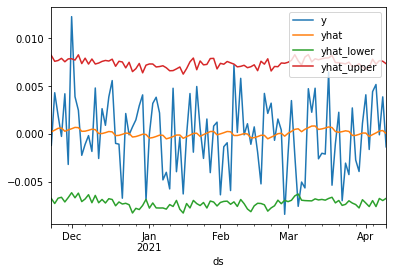

In [204]:
to_plot = ds_y.copy()
to_plot[['yhat','yhat_lower','yhat_upper']] = forecast[['yhat','yhat_lower','yhat_upper']][:-num_days]
to_plot.set_index('ds',inplace=True)
to_plot[-100:].plot()

to_plot
